# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Khong**  <br/>
Firstname: **Lap Hoe**    <br/>
Student ID: **32114818**    <br/>
Email: **lkho0007@student.monash.edu**    <br/>
Your tutorial time: **Tuesday 2PM**    <br/>
***

## <span style="color:#0b486b">Instruction</span>

This assignment contains **one** parts:

* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 3**. Going through these materials before attempting this part is highly recommended.

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [11]:
import tensorflow as tf
from tensorflow import keras 

In [12]:
tf.random.set_seed(1234)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.


In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data()


The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [14]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full = X_train_full_img.reshape(num_train, -1)
X_test = X_test_img.reshape(num_test, -1)

# One-hot encode our data for label smoothing in the following section 
y_train_full_onehot = keras.utils.to_categorical(y_train_full)
y_test_onehot = keras.utils.to_categorical(y_test)

print("--BEFORE ONEHOT--")
print(f"Training shape: {X_train_full.shape}, Training label shape: {y_train_full.shape}")
print(f"Testing shape: {X_test.shape}, Testing label shape: {y_test.shape}")

print("--AFTER ONEHOT--")
print(f"Training shape: {X_train_full.shape}, Training label shape: {y_train_full_onehot.shape}")
print(f"Testing shape: {X_test.shape}, Testing label shape: {y_test_onehot.shape}")

--BEFORE ONEHOT--
Training shape: (60000, 784), Training label shape: (60000,)
Testing shape: (10000, 784), Testing label shape: (10000,)
--AFTER ONEHOT--
Training shape: (60000, 784), Training label shape: (60000, 10)
Testing shape: (10000, 784), Testing label shape: (10000, 10)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [15]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)

# Print out the dimensions of X_train_full and X_test 
print(f"X_train_full: {X_train_full.shape}")
print(f"X_test: {X_test.shape}")

# Use 10% of X_train_full for validation and 90% for training
X_train, y_train = X_train_full[:i], y_train_full_onehot[:i] # training
X_valid, y_valid = X_train_full[i:], y_train_full_onehot[i:] # validation

# Scale pixels within [0, 1]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

X_train_full: (60000, 784)
X_test: (10000, 784)


####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show **random** $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

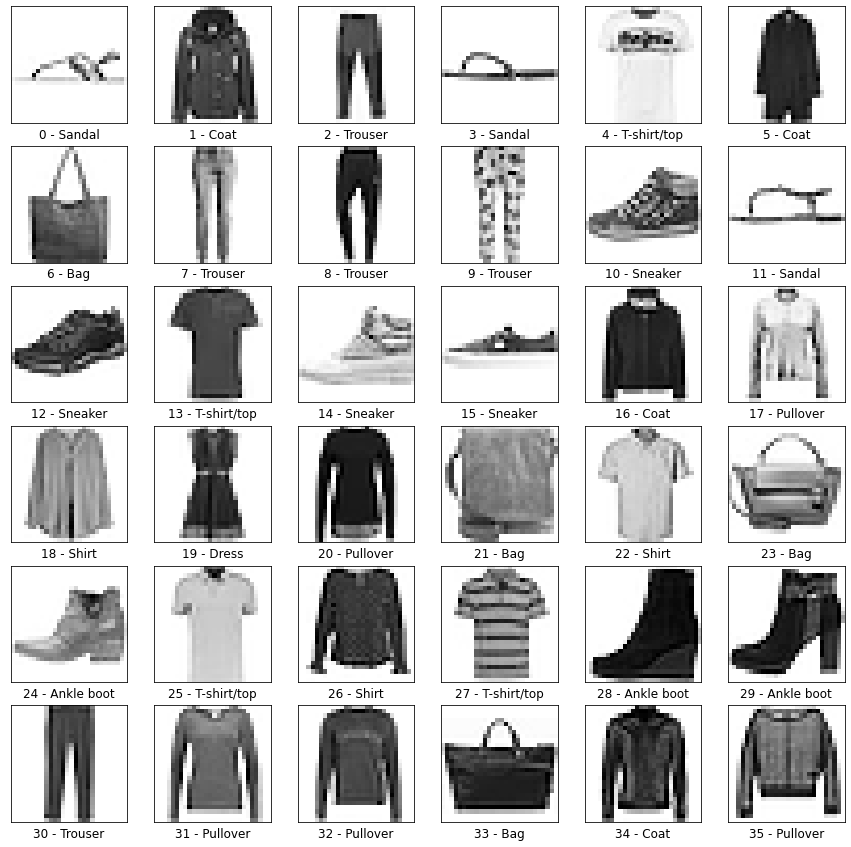

In [17]:
# Label mapping for each of the labels
LABEL_DICT = {"0":"T-shirt/top", "1":"Trouser", "2":"Pullover", "3":"Dress", "4":"Coat", "5":"Sandal", "6":"Shirt", "7":"Sneaker", "8":"Bag", "9":"Ankle boot"}

def random_idx(minval, maxval):
    return tf.random.uniform(shape=(), minval=minval, maxval=maxval, dtype=tf.int32)

# Display num2display images from an image dataset 
def display_image(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    for i in range(num2display):
        
        # Generate random index
        random_val = random_idx(0, maxval=images.shape[0])
        
        p = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
        p.imshow(images[random_val], cmap="Greys") # To match output cmap
        p.set_title(f"{i} - {LABEL_DICT[str(label[random_val])]}",y=0, pad=-15)

# Showing 36 of the X_train_full img
display_image(X_train_full_img, y_train_full, 36)

####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [18]:
# Feed-forward neural network
class FASHION_MNIST_DNN(tf.keras.Model):
    def __init__(self, n_classes=10, *args, **kwargs) -> None:
        super(FASHION_MNIST_DNN, self).__init__(*args, **kwargs)
        self.n_classes = n_classes 
        self.layer1 = tf.keras.layers.Dense(units=20, activation='relu', name="q2.4l1", kernel_initializer="lecun_uniform") # 20(ReLU)
        self.layer2 = tf.keras.layers.Dense(units=40, activation='relu',name="q2.4l2",kernel_initializer="lecun_uniform") # 40(ReLU)
        self.layer3= tf.keras.layers.Dense(units=n_classes, activation="softmax",name="q2.4ol",kernel_initializer="lecun_uniform") # 10(softmax)
    
    def call(self, X):
        h = self.layer1(X)
        h = self.layer2(h)
        h = self.layer3(h)
        
        return h 

dnn_model = FASHION_MNIST_DNN(n_classes=10, name="fashin_dnn_model")
dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 2s 742us/step - loss: 0.5707 - accuracy: 0.8009 - val_loss: 0.4588 - val_accuracy: 0.8378
Epoch 2/20
1688/1688 [==============================] - 1s 681us/step - loss: 0.4195 - accuracy: 0.8513 - val_loss: 0.3927 - val_accuracy: 0.8598
Epoch 3/20
1688/1688 [==============================] - 1s 678us/step - loss: 0.3858 - accuracy: 0.8604 - val_loss: 0.3813 - val_accuracy: 0.8588
Epoch 4/20
1688/1688 [==============================] - 1s 673us/step - loss: 0.3650 - accuracy: 0.8677 - val_loss: 0.3739 - val_accuracy: 0.8632
Epoch 5/20
1688/1688 [==============================] - 1s 676us/step - loss: 0.3494 - accuracy: 0.8727 - val_loss: 0.3717 - val_accuracy: 0.8673
Epoch 6/20
1688/1688 [==============================] - 1s 672us/step - loss: 0.3371 - accuracy: 0.8770 - val_loss: 0.3700 - val_accuracy: 0.8673
Epoch 7/20
1688/1688 [==============================] - 1s 682us/step - loss: 0.3261 - accuracy: 0.8812 - val_loss: 0.3651 -

In [21]:
# Evaluating the trained model on the test set 
loss, acc = dnn_model.evaluate(x=X_test, y=y_test_onehot)
print(f"The accuracy for this DNN Model is {acc}")

313/313 [==============================] - 0s 574us/step - loss: 0.3751 - accuracy: 0.8701
The accuracy for this DNN Model is 0.8701000213623047


####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [29]:
"""GridSeachDNN
This class is a helper class that can allow me to perform hyper-parameter tuning easily.

model_generator: A function that generates compiled models based on a set of parameters
generate_model: A function that generates different models with different parameters
training: The training set to perform tuning on
valid: The validation set to perform tuning on
testing: The testing set to perform tuning on

**kwargs: Pass in the collection of parameters that is used in the tuning process
"""
class GridSearchDNN: 
    def __init__(self, model_generator, generate_model, training, valid, testing, **kwargs) -> None:
        self.test_models = model_generator(generate_model, **kwargs)
        self.X_train, self.y_train = training
        self.valid = valid
        self.X_test, self.y_test = testing
        self.best_model = None 
        self.best_acc = None 
        self.best_desc = None
    
    """ test_iterator 
    This function iteratively trains all generated models. 
    save_progress: Control the saving of each generated model's results 
    save_dir: Directory to save the model to
    verbose: Controls the verbosity of each training iteration 
    
    returns: Returns the best model with the best accuracy on the testing set, and also returns a description of the model. 
    """
    def test_iterator(self, save_progress=False, epochs=5, save_dir="", verbose=True): 
        best_model, best_acc, best_desc = None, None, None
        for model, desc in self.test_models:
            print(f"--NOW TESTING {desc}--\n")
            history = model.fit(self.X_train, self.y_train, validation_data=self.valid, epochs=epochs, verbose=verbose)
            test_loss, test_acc = model.evaluate(self.X_test, self.y_test)
            
            # Finds the best evaluation on the test dataset
            if best_acc == None or test_acc > best_acc:
                best_model = model 
                best_acc = test_acc
                best_desc = desc 
            if save_progress:
                model.save(f"models/{save_dir}/{desc}")
            print(f"\n--END TESTING {desc} with test accuracy {test_acc}--")
        
        self.best_model = best_model
        self.best_acc = best_acc
        self.best_desc = best_desc
                
        return best_model, best_acc, best_desc 
    

In [26]:
from typing import List # Type checking

def generate_model(neurons: List[int], activation: str) -> tf.keras.models: 
    model = tf.keras.Sequential()
    for neuron in neurons: 
        model.add(tf.keras.layers.Dense(units=neuron, activation=activation))
    model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    desc = f"{neurons}{activation}"
    
    return model, desc

def model_generator(generate_model, **kwargs): 
    all_models = [] 
    for neuron in kwargs.get('neurons'):
        for activation in kwargs.get('activations'):
            dnn_model, desc = generate_model(neuron, activation)
            dnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
            all_models.append((dnn_model, desc))    
    return all_models     

In [30]:
grid = GridSearchDNN(model_generator, generate_model, (X_train, y_train), (X_valid, y_valid), (X_test, y_test_onehot), neurons=[[x,y]for x in [20, 40] for y in [20,40]], activations=['tanh', 'sigmoid', 'relu'])
grid.test_iterator(save_progress=True, epochs=20, save_dir="q2.5models", verbose=False)

# [40,40 ReLu] is the best model

--NOW TESTING [20, 20]tanh--

313/313 [==============================] - 0s 506us/step - loss: 0.5609 - accuracy: 0.7948
INFO:tensorflow:Assets written to: models/q2.5models/[20, 20]tanh\assets

--END TESTING [20, 20]tanh with test accuracy 0.7947999835014343--
--NOW TESTING [20, 20]sigmoid--

313/313 [==============================] - 0s 532us/step - loss: 0.4618 - accuracy: 0.8295
INFO:tensorflow:Assets written to: models/q2.5models/[20, 20]sigmoid\assets

--END TESTING [20, 20]sigmoid with test accuracy 0.8295000195503235--
--NOW TESTING [20, 20]relu--

313/313 [==============================] - 0s 510us/step - loss: 0.5135 - accuracy: 0.8324
INFO:tensorflow:Assets written to: models/q2.5models/[20, 20]relu\assets

--END TESTING [20, 20]relu with test accuracy 0.8324000239372253--
--NOW TESTING [20, 40]tanh--

313/313 [==============================] - 0s 529us/step - loss: 0.5450 - accuracy: 0.8067
INFO:tensorflow:Assets written to: models/q2.5models/[20, 40]tanh\assets

--END TEST

(<keras.engine.sequential.Sequential at 0x22c2283cc10>,
 0.8529000282287598,
 '[40, 40]relu')

####  <span style="color:red">**Question 2.6**</span>. Experimenting with **the label smoothing** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

In [33]:
# Label smoothing on one_hot labels.
def label_smoothing(y_labels, smoothing_factor, num_classes):
    smooth_labels = y_labels * (1 - smoothing_factor) + smoothing_factor / num_classes
    return smooth_labels 

alphas = [0.1, 0.15, 0.2]
best_acc, best_alpha = None, None

for alpha in alphas: 
    print(f"--TESTING {alpha}--") 
    
    # Generating a model from previous function
    model, _ = generate_model(neurons=[40,40], activation='relu')
    
    # Training model with label smoothing
    model.fit(X_train, label_smoothing(y_train, alpha, 10), epochs=20, verbose=0)
    
    # Evaluating the model after training 
    loss, test_acc = model.evaluate(X_test, y_test_onehot)
    
    if best_acc is None or test_acc > best_acc:
        best_acc = test_acc 
        best_alpha = alpha
    
    print(f"--END {alpha} with test accuracy of {test_acc}\n")
    
print(f"The best alpha smoothing value on labels is {best_alpha}, with a reported test accuracy of {best_acc}")
    

--TESTING 0.1--
313/313 [==============================] - 0s 526us/step - loss: 0.5294 - accuracy: 0.8450
--END 0.1 with test accuracy of 0.8450000286102295

--TESTING 0.15--
313/313 [==============================] - 1s 622us/step - loss: 0.5266 - accuracy: 0.8553
--END 0.15 with test accuracy of 0.8553000092506409

--TESTING 0.2--
313/313 [==============================] - 0s 612us/step - loss: 0.5881 - accuracy: 0.8456
--END 0.2 with test accuracy of 0.8456000089645386

The best alpha smoothing value on labels is 0.15, with a reported test accuracy of 0.8553000092506409
